- saksham singh

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pickle

In [2]:
df_full = pd.read_csv('data/processed_data_full.csv')
df_full

,audio,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,class
0,cleaned_8674.mp3,-385.44440,129.04025,19.112260,-1.919574,26.989328,15.824418,-18.350409,-19.556070,-4.013902,...,0.080310,0.154680,0.254320,0.306306,0.342816,0.290574,0.235572,0.191639,0.186949,Malayalam
1,cleaned_16083.mp3,-178.47522,121.35514,-115.881710,49.920315,-44.342896,-10.934672,-4.226339,-28.575838,11.981096,...,0.402346,0.423565,0.401525,0.394345,0.387062,0.342344,0.368453,0.416400,0.405577,Kannada
2,cleaned_8715.mp3,-254.69008,112.86706,-16.675797,22.164055,6.623632,5.411475,-29.988657,-19.756042,1.692432,...,0.160203,0.097531,0.062060,0.073834,0.132222,0.162244,0.221481,0.298347,0.346304,Tamil
3,cleaned_13101.mp3,-353.27270,86.78839,-10.396987,12.217551,7.680600,6.734065,-5.944738,-11.770280,-7.756648,...,0.148111,0.170127,0.166232,0.223810,0.251503,0.212192,0.191568,0.127062,0.105697,Malayalam
4,cleaned_17768.mp3,-322.90872,104.32171,-13.687944,-14.229614,-0.199792,-12.588677,-27.879568,-9.221730,-8.606593,...,0.244453,0.216809,0.227110,0.188739,0.089613,0.074615,0.069977,0.060961,0.061547,Malayalam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227667,cleaned_5366.mp3,-353.67940,133.51074,0.011909,0.551560,1.289693,14.672746,-3.450757,-23.686523,-2.759441,...,0.262415,0.251547,0.229713,0.230998,0.285324,0.246883,0.163802,0.144452,0.165285,Malayalam
227668,cleaned_13169.mp3,-360.76120,132.99254,-11.490824,14.928202,23.983180,25.502825,-13.743700,4.704885,1.364624,...,0.410632,0.374963,0.371156,0.393593,0.388905,0.430181,0.388074,0.346624,0.361737,Malayalam
227669,cleaned_16843.mp3,-248.88065,153.51881,-8.148202,12.299946,10.989255,-0.021882,-14.626765,-3.347354,-3.923789,...,0.304109,0.305823,0.237413,0.177823,0.140093,0.153946,0.235856,0.360186,0.422469,Marathi
227670,cleaned_7781.mp3,-275.65448,158.22237,-4.326516,0.413423,5.877956,-3.143020,-10.275004,-2.931039,-3.778616,...,0.328649,0.271954,0.280401,0.261808,0.261708,0.280204,0.300941,0.394180,0.429376,Marathi


In [3]:
df_full.columns

Index(['audio', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7',
       'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14',
       'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'mfcc21',
       'mfcc22', 'mfcc23', 'mfcc24', 'mfcc25', 'mfcc_delta1', 'mfcc_delta2',
       'mfcc_delta3', 'mfcc_delta4', 'mfcc_delta5', 'mfcc_delta6',
       'mfcc_delta7', 'mfcc_delta8', 'mfcc_delta9', 'mfcc_delta10',
       'mfcc_delta11', 'mfcc_delta12', 'mfcc_delta13', 'mfcc_delta14',
       'mfcc_delta15', 'mfcc_delta16', 'mfcc_delta17', 'mfcc_delta18',
       'mfcc_delta19', 'mfcc_delta20', 'mfcc_delta21', 'mfcc_delta22',
       'mfcc_delta23', 'mfcc_delta24', 'mfcc_delta25', 'spectral_centroid',
       'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness',
       'spectral_rolloff', 'chroma_stft1', 'chroma_stft2', 'chroma_stft3',
       'chroma_stft4', 'chroma_stft5', 'chroma_stft6', 'chroma_stft7',
       'chroma_stft8', 'chroma_stft9', 'chroma_stft

/var/folders/tc/8g6g_hgn5zx4bzcxx9688mhw0000gn/T/ipykernel_50312/1298084999.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_full.corr()


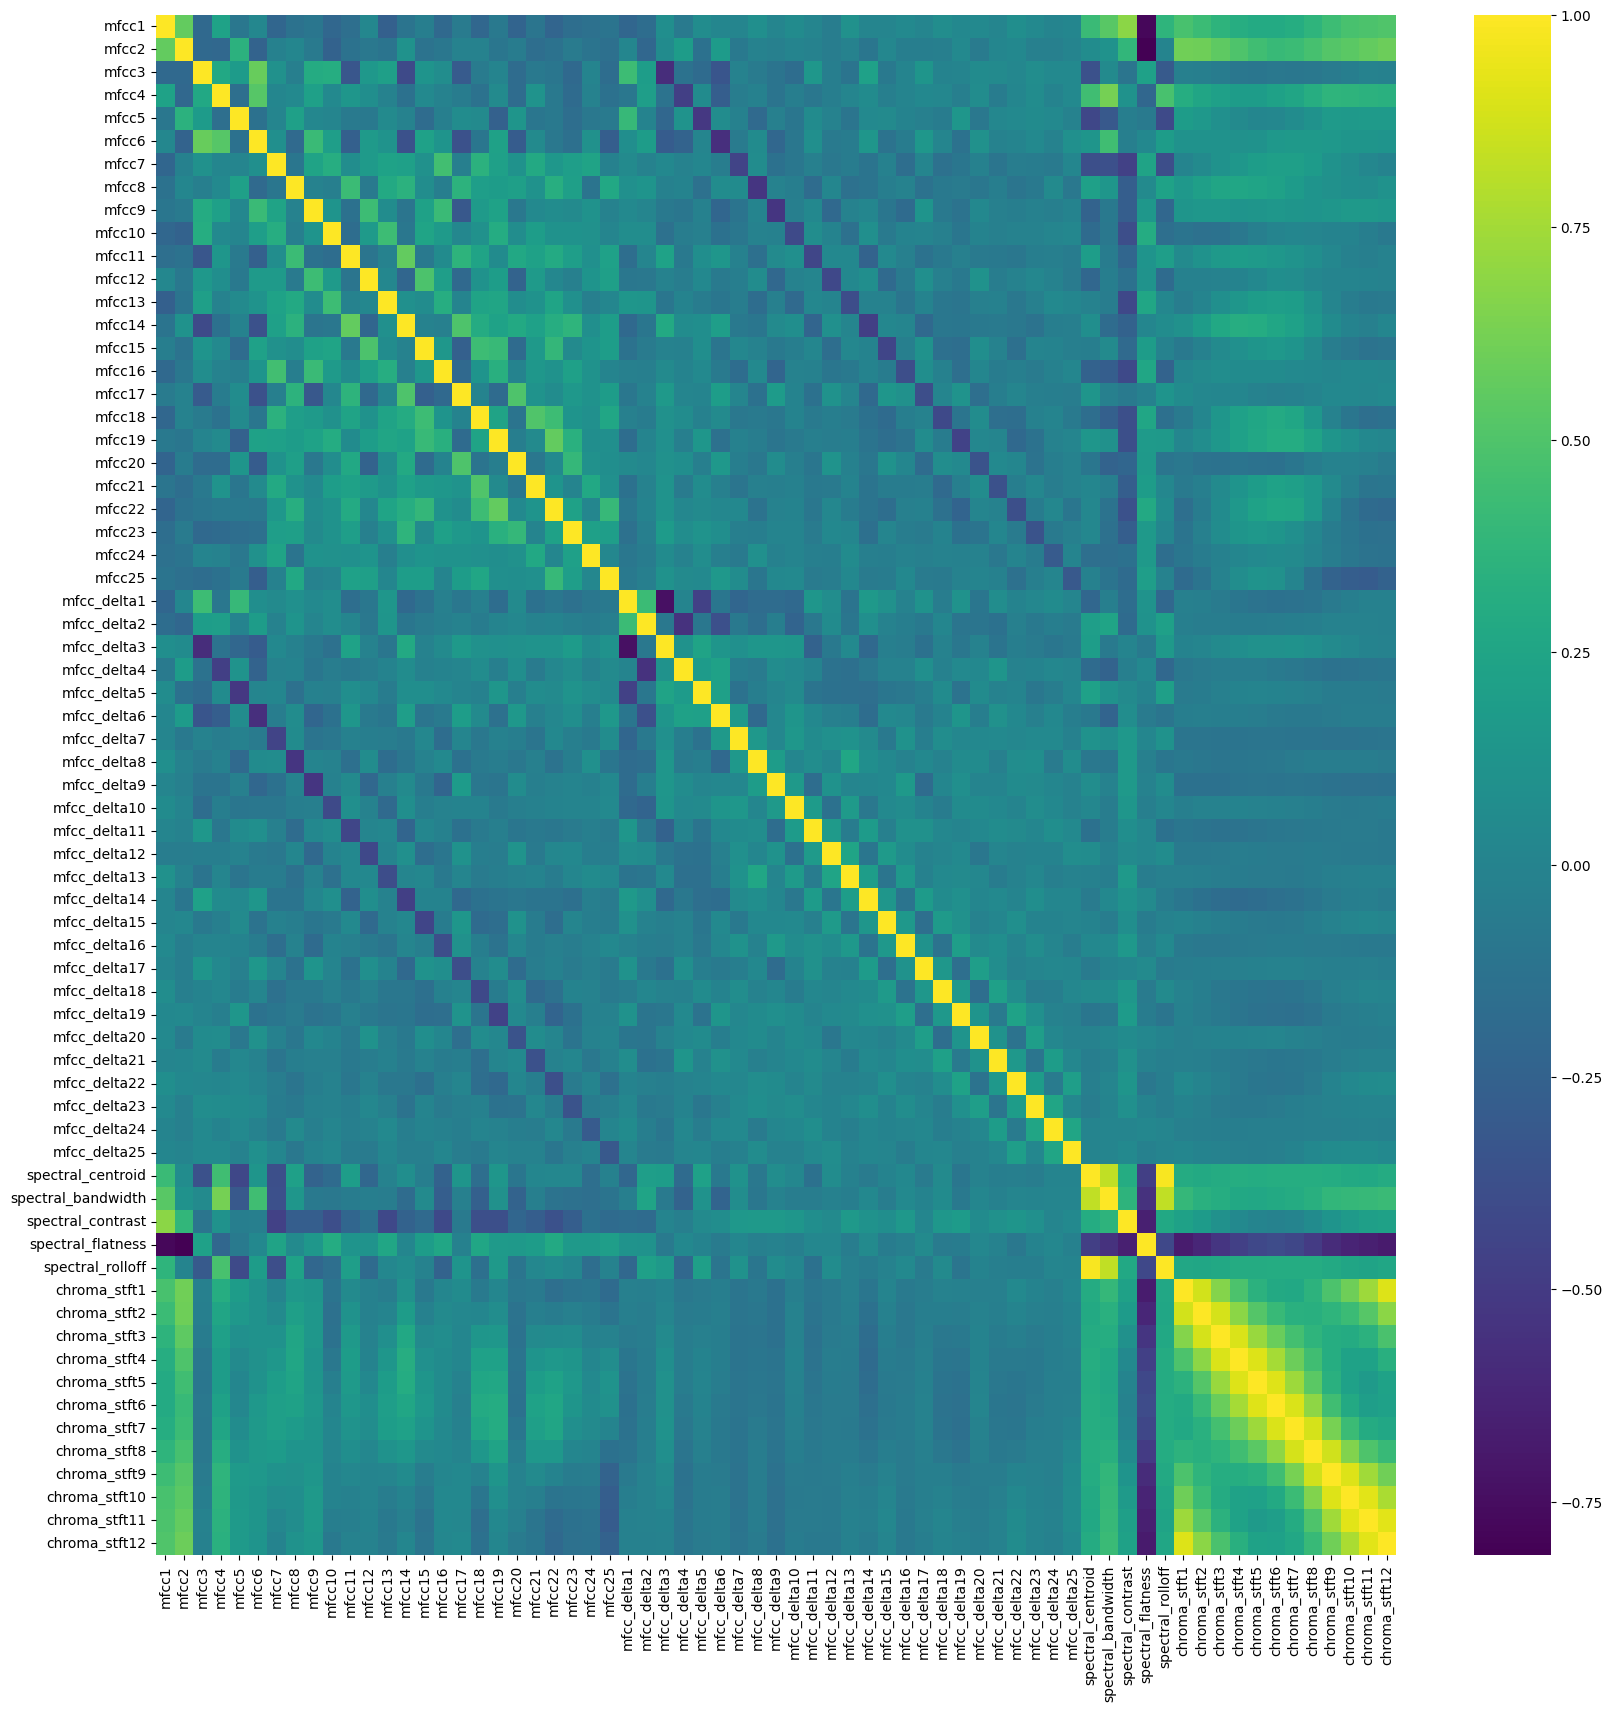

In [4]:
# correlation matrix
corr = df_full.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr, cmap='viridis')
plt.show()

In [5]:
# create a new df by selecting 5000 random rows of each class from original df
df_50 = df_full.groupby('class').apply(lambda x: x.sample(5000)).reset_index(drop=True)
df_50

,audio,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,chroma_stft4,chroma_stft5,chroma_stft6,chroma_stft7,chroma_stft8,chroma_stft9,chroma_stft10,chroma_stft11,chroma_stft12,class
0,cleaned_7825.mp3,-318.75406,173.498930,-5.240784,19.014400,21.946463,1.071952,2.496477,-3.639060,-4.913215,...,0.344787,0.293262,0.276167,0.299517,0.347504,0.369756,0.433130,0.476007,0.487835,Bengali
1,cleaned_16581.mp3,-424.61813,69.380010,-1.671892,19.842463,0.188474,5.365619,-4.969523,-1.327905,6.800130,...,0.148664,0.143752,0.166377,0.204205,0.236452,0.252686,0.247117,0.222160,0.207703,Bengali
2,cleaned_27.mp3,-336.51773,141.865000,1.687798,16.617485,15.751399,1.949467,1.426030,-5.003255,-3.332348,...,0.305837,0.317105,0.305416,0.270680,0.234716,0.227824,0.250236,0.302045,0.384051,Bengali
3,cleaned_2737.mp3,-402.76556,93.007416,-3.425313,22.343355,6.661223,10.165629,-1.588566,4.648809,5.535743,...,0.228887,0.261310,0.294118,0.341238,0.362333,0.371277,0.377956,0.357206,0.297018,Bengali
4,cleaned_7785.mp3,-394.36240,96.391140,21.696917,9.136859,11.858361,5.062033,-0.801583,6.500277,8.914679,...,0.179388,0.190229,0.217879,0.274122,0.300274,0.322041,0.332049,0.330779,0.276806,Bengali
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,cleaned_25705.mp3,-355.24307,119.185104,14.192652,43.132800,17.189762,11.888141,-9.745198,-7.144052,11.133019,...,0.299597,0.319420,0.300275,0.298784,0.381098,0.442094,0.454591,0.452416,0.403943,Urdu
44996,cleaned_15347.mp3,-372.43360,110.516520,-1.403951,19.284323,11.008694,-4.793604,-4.129134,-1.551407,-6.499020,...,0.174251,0.184584,0.198568,0.190830,0.187823,0.223842,0.270485,0.316559,0.282343,Urdu
44997,cleaned_1624.mp3,-388.33987,62.231860,-0.007892,11.263835,11.858973,4.954277,-5.553070,1.637504,-0.843497,...,0.147123,0.165060,0.197972,0.183200,0.153930,0.154190,0.155138,0.145220,0.162541,Urdu
44998,cleaned_12175.mp3,-421.63214,97.052704,-14.101510,33.171158,-3.526669,28.285490,-2.357740,-8.107309,-3.946804,...,0.185011,0.175928,0.217357,0.254393,0.269690,0.313876,0.373414,0.407890,0.308073,Urdu


In [7]:
X = df_50.drop(['class', 'audio'], axis=1)
y = df_50['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)

SVC()

train accuracy:  0.9883888888888889
test accuracy:  0.9787777777777777
test classification report: 
               precision    recall  f1-score   support

     Bengali       0.98      0.99      0.98      1026
    Gujarati       0.97      0.98      0.98      1020
       Hindi       0.97      1.00      0.98       960
     Kannada       0.98      0.97      0.98       985
   Malayalam       0.98      0.99      0.98      1009
     Marathi       0.97      0.97      0.97       994
       Tamil       0.99      0.98      0.99       995
      Telugu       0.99      0.98      0.98       977
        Urdu       0.97      0.95      0.96      1034

    accuracy                           0.98      9000
   macro avg       0.98      0.98      0.98      9000
weighted avg       0.98      0.98      0.98      9000



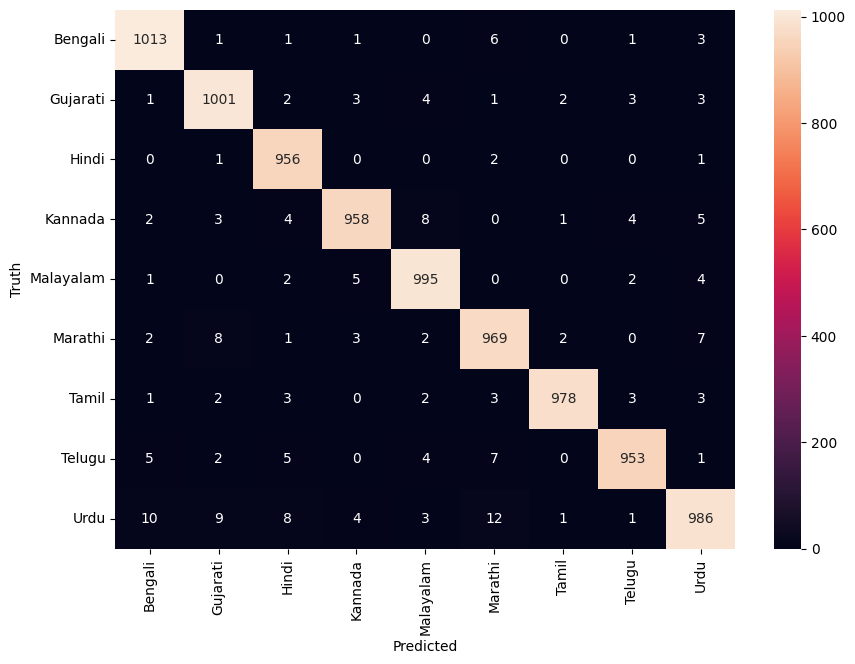

In [17]:
print('train accuracy: ', rbf_svc.score(X_train, y_train))
print('test accuracy: ', rbf_svc.score(X_test, y_test))

print('test classification report: \n', classification_report(y_test, rbf_svc.predict(X_test)))

cm = confusion_matrix(y_test, rbf_svc.predict(X_test))
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(len(df_50['class'].unique())) + 0.5, df_50['class'].unique(), rotation='vertical')
plt.yticks(np.arange(len(df_50['class'].unique())) + 0.5, df_50['class'].unique(), rotation='horizontal')
plt.show()

## GRID SEARCH FOR SVM

In [27]:
C = [0.1, 1, 10, 100]
test_accuracy_rbf = []

for c in C:
    rbf_svc = SVC(kernel='rbf', C=c, random_state=42)
    rbf_svc.fit(X_train, y_train)
    # train_accuracy.append(rbf_svc.score(X_train, y_train))
    test_accuracy_rbf.append([rbf_svc.score(X_test, y_test), c])

In [28]:
test_accuracy_rbf

[[0.9455690508322088, 0.1],
 [0.9798695456590193, 1],
 [0.9849302744039586, 10],
 [0.9848178137651822, 100]]

In [14]:
test_accuracy_lin = []

for c in C:
    if c == 100:
        c = 10
    lin_svc = SVC(kernel='linear', C=c, random_state=42)
    lin_svc.fit(X_train, y_train)
    # train_accuracy.append(lin_svc.score(X_train, y_train))
    test_accuracy_lin.append([lin_svc.score(X_test, y_test), c])

test_accuracy_lin

[[0.9224021592442645, 0.1],
 [0.9266756635177688, 1],
 [0.9273504273504274, 10],
 [0.9273504273504274, 10]]

In [15]:
test_accuracy_lin[3][1] = 100
test_accuracy_lin

[[0.9224021592442645, 0.1],
 [0.9266756635177688, 1],
 [0.9273504273504274, 10],
 [0.9273504273504274, 100]]

In [21]:
poly_svc = SVC(kernel='poly', degree=3, random_state=42, C=100)
poly_svc.fit(X_train, y_train)
poly_svc.score(X_test, y_test)

0.9723346828609987

In [22]:
test_accuracy_poly = []

for c in C:
    poly_svc = SVC(kernel='poly', C=c, random_state=42)
    poly_svc.fit(X_train, y_train)
    # train_accuracy.append(poly_svc.score(X_train, y_train))
    test_accuracy_poly.append([poly_svc.score(X_test, y_test), c])

test_accuracy_poly

[[0.9039586144849303, 0.1],
 [0.9673864147548358, 1],
 [0.9731219073324336, 10],
 [0.9723346828609987, 100]]

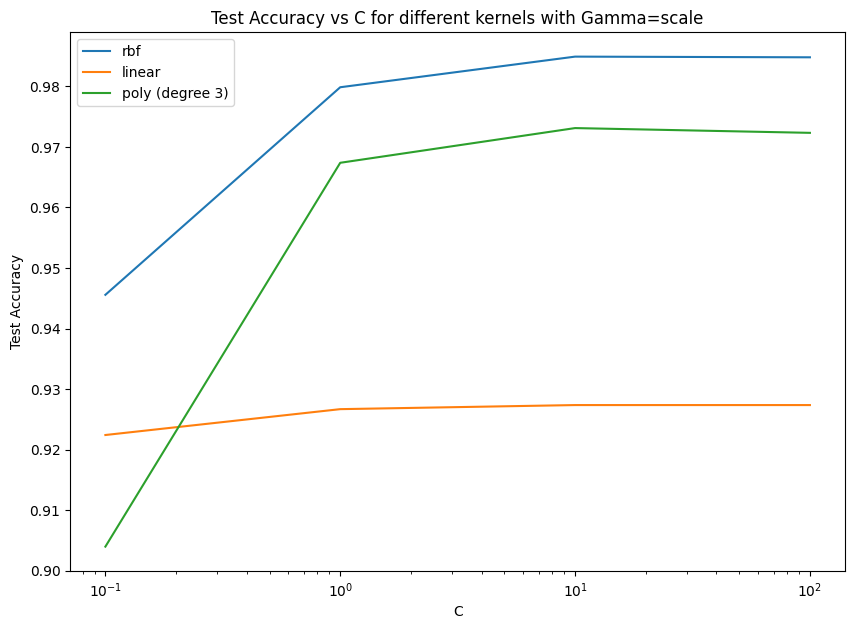

In [30]:
# plot test accuracy vs C for different kernels
plt.figure(figsize=(10, 7))
plt.plot([i[1] for i in test_accuracy_rbf], [i[0] for i in test_accuracy_rbf], label='rbf')
plt.plot([i[1] for i in test_accuracy_lin], [i[0] for i in test_accuracy_lin], label='linear')
plt.plot([i[1] for i in test_accuracy_poly], [i[0] for i in test_accuracy_poly], label='poly (degree 3)')
plt.xlabel('C')
plt.ylabel('Test Accuracy')
plt.xscale('log')
plt.legend()
plt.title('Test Accuracy vs C for different kernels with Gamma=scale')
plt.show()


In [34]:
# implement 5 fold cross validation
from sklearn.model_selection import cross_val_score

scores = []

for c in C:
    rbf_svc = SVC(kernel='rbf', C=c, random_state=42)
    scores.append([cross_val_score(rbf_svc, X, y, cv=5), c])

scores

[[array([0.93927126, 0.94062078, 0.94287   , 0.9465812 , 0.93712743]), 0.1],
 [array([0.97649573, 0.97930724, 0.97818264, 0.97840756, 0.97503093]), 1],
 [array([0.9820063 , 0.98301844, 0.98290598, 0.98391813, 0.98222922]), 10],
 [array([0.9820063 , 0.98335583, 0.9831309 , 0.98414305, 0.98222922]), 100]]

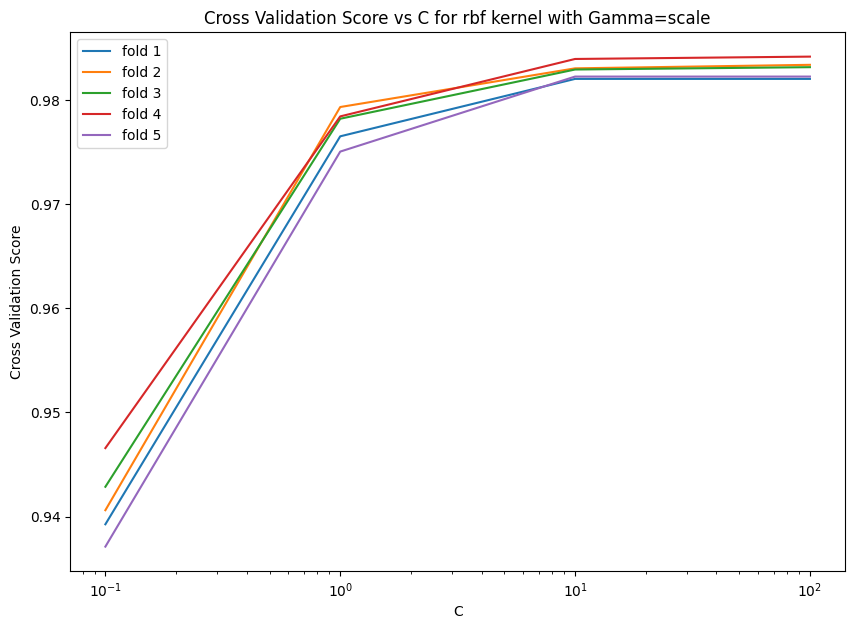

In [36]:
# plot cross validation scores vs C for rbf kernel
plt.figure(figsize=(10, 7))
# plot fold 1
plt.plot([i[1] for i in scores], [i[0][0] for i in scores], label='fold 1')
# plot fold 2
plt.plot([i[1] for i in scores], [i[0][1] for i in scores], label='fold 2')
# plot fold 3
plt.plot([i[1] for i in scores], [i[0][2] for i in scores], label='fold 3')
# plot fold 4
plt.plot([i[1] for i in scores], [i[0][3] for i in scores], label='fold 4')
# plot fold 5
plt.plot([i[1] for i in scores], [i[0][4] for i in scores], label='fold 5')
plt.xlabel('C')
plt.ylabel('Cross Validation Score')
plt.xscale('log')
plt.legend()
plt.title('Cross Validation Score vs C for rbf kernel with Gamma=scale')
plt.show()

In [2]:
train = pd.read_csv('data/data_train.csv')
test = pd.read_csv('data/data_test.csv')

X_train = train.drop('class', axis=1)
y_train = train['class']
X_test = test.drop('class', axis=1)
y_test = test['class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
rbf_svc_full = SVC(kernel='rbf', C=10, random_state=42, verbose=True)
rbf_svc_full.fit(X_train, y_train)

[LibSVM]....*..*
optimization finished, #iter = 6705
obj = -1639.050422, rho = -0.308287
nSV = 1142, nBSV = 89
...*.*
optimization finished, #iter = 4891
obj = -1228.798360, rho = -0.388387
nSV = 925, nBSV = 61
....*..*
optimization finished, #iter = 6575
obj = -1331.582395, rho = 0.757125
nSV = 1776, nBSV = 55
...*..*
optimization finished, #iter = 5664
obj = -765.782451, rho = 0.854862
nSV = 1662, nBSV = 11
.......*.....*
optimization finished, #iter = 12464
obj = -2717.082155, rho = -0.388235
nSV = 1693, nBSV = 128
..*..*
optimization finished, #iter = 4514
obj = -1152.582628, rho = -0.280167
nSV = 1027, nBSV = 58
...*...*
optimization finished, #iter = 6101
obj = -899.705524, rho = -0.237725
nSV = 1186, nBSV = 10
.........*.....*
optimization finished, #iter = 14287
obj = -3274.089275, rho = -0.044660
nSV = 2032, nBSV = 168
..*.*
optimization finished, #iter = 3208
obj = -1362.263104, rho = -0.212138
nSV = 773, nBSV = 97
....*..*
optimization finished, #iter = 6925
obj = -2029.5727

SVC(C=10, random_state=42, verbose=True)

In [4]:
y_pred = rbf_svc_full.predict(X_test)

print('test accuracy: ', accuracy_score(y_test, y_pred))
print('test classification report: \n', classification_report(y_test, y_pred))

test accuracy:  0.9903809551696876
test classification report: 
               precision    recall  f1-score   support

     Bengali       0.99      0.99      0.99      8164
    Gujarati       0.99      0.99      0.99      7868
       Hindi       0.98      1.00      0.99      7636
     Kannada       0.99      0.97      0.98      6488
   Malayalam       0.99      0.99      0.99      7200
     Marathi       0.99      0.99      0.99      7426
       Tamil       1.00      0.99      0.99      7258
      Telugu       1.00      0.99      0.99      7096
        Urdu       0.99      0.99      0.99      9166

    accuracy                           0.99     68302
   macro avg       0.99      0.99      0.99     68302
weighted avg       0.99      0.99      0.99     68302



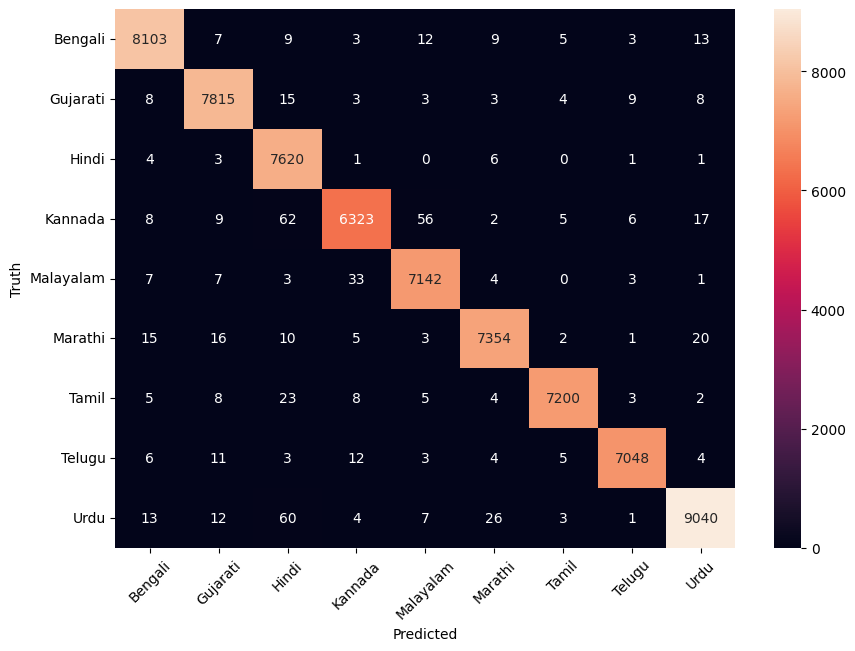

In [6]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(np.arange(0.5, 9.5), rbf_svc_full.classes_, rotation=45)
plt.yticks(np.arange(0.5, 9.5), rbf_svc_full.classes_, rotation=0)
plt.show()


In [8]:
# save the model
with open('models/svm_model.pkl', 'wb') as f:
    pickle.dump(rbf_svc_full, f)